In [1]:
import os

In [93]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import seaborn as sns
sns.set()

In [81]:
from matplotlib.colors import LinearSegmentedColormap

In [13]:
os.chdir('C:\\Users\\rgarcia\\Documents\\data\\Mapas_Boulos_Nunes_Tabata\\')

In [5]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/600.1.17\
 (KHTML, like Gecko) Version/8.0 Safari/600.1.17'

In [7]:
dataset_url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2022.zip'

In [14]:
[i for i in os.listdir() if 'munzona' in i]

['leiame_ votacao_candidato_munzona_2016_SP.pdf',
 'LEIAME_votacao_candidato_munzona_2016_SP.pdf',
 'votacao_candidato_munzona_2016_SP.csv',
 'votacao_candidato_munzona_2022_BR.csv',
 'votacao_candidato_munzona_2022_BRASIL.csv',
 'votacao_candidato_munzona_2022_SP.csv']

In [44]:
df = pd.read_csv('votacao_candidato_munzona_2022_BR.csv', sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [45]:
df = df[df.CD_MUNICIPIO == 71072].copy()

In [46]:
df = df.query('NR_TURNO == 2').copy()

In [47]:
df = df.query('DS_CARGO == "Presidente"').copy()

In [48]:
df = df.groupby(['NR_ZONA','NM_URNA_CANDIDATO']).QT_VOTOS_NOMINAIS.sum().reset_index().copy()

In [49]:
df = df.pivot(index='NR_ZONA', columns='NM_URNA_CANDIDATO', values='QT_VOTOS_NOMINAIS').reset_index().copy()

In [57]:
df.index = df.index.rename('idx')

In [59]:
df.columns = ['ZONA', 'BOLSONARO', 'LULA']

In [61]:
df['TOTAL_VALIDOS'] = df.BOLSONARO + df.LULA

In [67]:
df['PCT_DIFF'] = ((df.BOLSONARO - df.LULA)/df.TOTAL_VALIDOS*100).round(1)

In [146]:
df.sum()

ZONA               17257.0
BOLSONARO        3191484.0
LULA             3677921.0
TOTAL_VALIDOS    6869405.0
PCT_DIFF            -322.6
dtype: float64

In [71]:
zonas_mapa = gpd.read_file('zonas_eleitorais_Sao_Paulo_SP.geojson')
zonas_mapa = zonas_mapa.rename(columns={'Zona':'ZONA', 'Nome':'DS_ZONA'})

In [75]:
bolsolula = zonas_mapa.merge(df, on='ZONA', how='outer')

In [79]:
sns.set_style('white')

In [82]:
redenta_blyan = LinearSegmentedColormap.from_list('custom_diverging', ['#fc4f71', '#ffffff', '#3395ea'], N=256)

<AxesSubplot: title={'center': 'A votação para presidente no 2º turno de 2022 em São Paulo\n\nVOTOS: Lula 3.677.921 x 3.191.484 Bolsonaro'}>

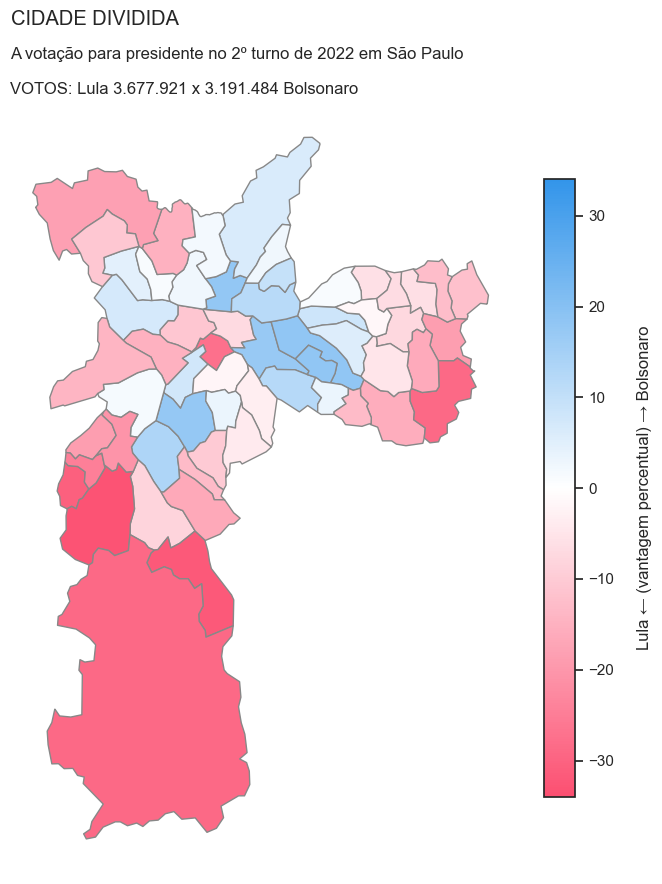

In [153]:
fig, ax = plt.subplots(figsize=(7,9))
ax.set_title('A votação para presidente no 2º turno de 2022 em São Paulo\n\nVOTOS: Lula 3.677.921 x 3.191.484 Bolsonaro', ha='left', x=-0)
ax.set_axis_off()
plt.suptitle('CIDADE DIVIDIDA', ha='left', x=0.07)
plt.tight_layout()

bolsolula.plot('PCT_DIFF', ax=ax, cmap=redenta_blyan, vmax=34, vmin=-34, legend=True,
                legend_kwds={'shrink': 0.8, 'label':'\nLula ← (vantagem percentual) → Bolsonaro'},
                linewidth=1, edgecolor='#888888')

In [154]:
fig.savefig('Bolsonaro_vs_Lula_2022_SaoPauloSP.svg')

In [155]:
os.getcwd()

'C:\\Users\\rgarcia\\Documents\\data\\Mapas_Boulos_Nunes_Tabata'

In [164]:
((1200000*0.015)-4500)/10

1350.0

In [162]:
(((600000*0.011)-900))/10

570.0